In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available")
else:
    print("GPU is not available, using CPU")

GPU is available


In [75]:
tf.random.set_seed(42)  # For TensorFlow/Keras
sub_caption = 'c' # for the subcaption of confusion matrix figure

#### checking duplication to ensure no duplicated items left

In [76]:
# # Use np.unique with axis=0 and return_inverse to identify duplicates
# _, idx, counts = np.unique(X, axis=0, return_index=True, return_counts=True)

# # Get duplicated rows
# duplicated_rows = X[np.isin(np.arange(X.shape[0]), idx[counts > 1])]

# print("Duplicated rows:")
# print(duplicated_rows)

In [77]:
# Set window size (124 time steps per sample)
window_size = 1240
data_name = "resp"
dataset_number = 5
X_train = np.load(f'data/train_test_data/dataset_{dataset_number}_X_{data_name}_train_data.npy')
X_test = np.load(f'data/train_test_data/dataset_{dataset_number}_X_{data_name}_test_data.npy')

y_train = np.load(f'data/train_test_data/dataset_{dataset_number}_train_label.npy')
y_test = np.load(f'data/train_test_data/dataset_{dataset_number}_test_label.npy')

print("Train X shape:", X_train.shape)
print("Test X shape:", X_test.shape)
print("Train y shape:", y_train.shape)
print("Test y shape:", y_test.shape)
print(y_test)

Train X shape: (600, 1240)
Test X shape: (2400, 1240)
Train y shape: (600,)
Test y shape: (2400,)
[0 0 0 ... 0 0 0]


In [78]:
# Check if there are NaN or Inf values in the data
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    print("NaN values found in training data!")
if np.any(np.isinf(X_train)) or np.any(np.isinf(y_train)):
    print("Inf values found in training data!")

if np.any(np.isnan(X_test)) or np.any(np.isnan(y_test)):
    print("NaN values found in validation data!")
if np.any(np.isinf(X_test)) or np.any(np.isinf(y_test)):
    print("Inf values found in validation data!")

In [79]:
# Define the input shape (124 values, 1 feature per value)
input_shape = (window_size, 1)

# Build the Conv1D model (similar to AlexNet but adapted for 1D)
model = Sequential()

# 1st Conv1D layer
model.add(Conv1D(64, kernel_size=11, strides=1, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2, strides=2))

# 2nd Conv1D layer
model.add(Conv1D(128, kernel_size=5, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))

# 3rd Conv1D layer
model.add(Conv1D(256, kernel_size=3, strides=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))

# Flatten the output from Conv1D layers
model.add(Flatten())

# Fully connected layers (Dense layers)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer - assuming binary classification (adjust for your task)
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/home/ruk/thesis/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 1230, 64)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 615, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 611, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 305, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 303, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 151, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 38656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    39,584,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,250,497 (153.54 MB)

 Trainable params: 40,250,497 (153.54 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    # optimizer = "adam", 
    loss = "binary_crossentropy", 
    metrics = ["accuracy"] 
)

In [81]:
# Set up EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,          # Wait for 3 epochs after the last improvement
    min_delta=0.0001,
    verbose=1,           # Print when early stopping is triggered
    restore_best_weights=True  # Restore the weights from the best epoch
)

In [82]:
training_desc = model.fit(
    X_train,
    y_train,
    batch_size = 50, 
    epochs= 1000, 
    validation_split =0.2, 
    shuffle = True, 
    callbacks=[early_stopping] 
)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.4996 - loss: 0.6978 - val_accuracy: 0.4750 - val_loss: 0.6854
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5377 - loss: 0.6899 - val_accuracy: 0.5500 - val_loss: 0.6839
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5720 - loss: 0.6792 - val_accuracy: 0.6000 - val_loss: 0.6753
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5857 - loss: 0.6770 - val_accuracy: 0.6250 - val_loss: 0.6583
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6351 - loss: 0.6530 - val_accuracy: 0.7000 - val_loss: 0.6327
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6475 - loss: 0.6327 - val_accuracy: 0.7000 - val_loss: 0.5930
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7099 - loss: 0.5880 - val_accuracy: 0.7250 - val_loss: 0.5421
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6976 - loss: 0.5414 - val_acc

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


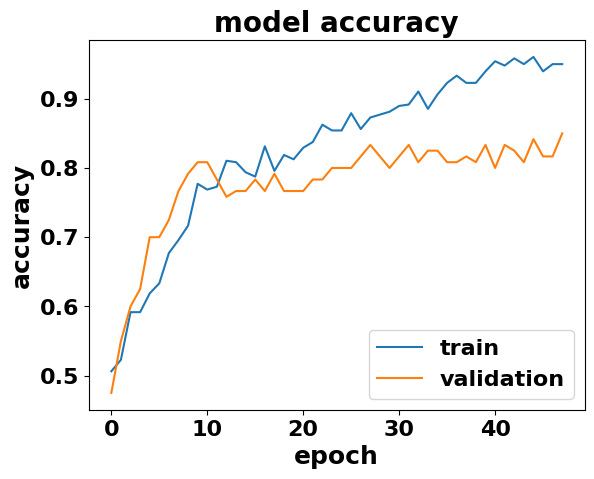

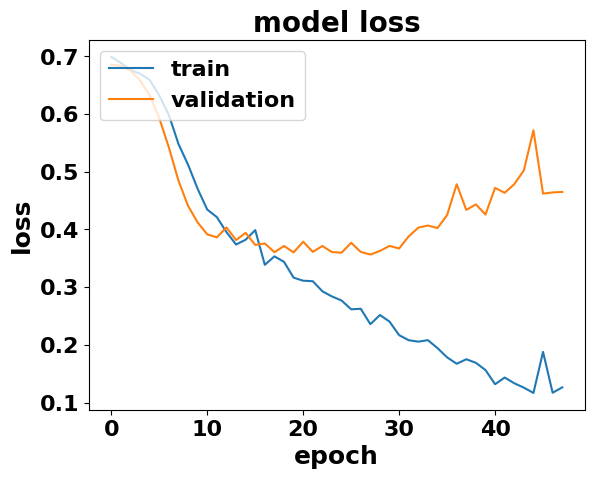

In [83]:
from matplotlib import pyplot as plt
print(training_desc.history.keys())
# summarize history for accuracy
plt.plot(training_desc.history['accuracy'])
plt.plot(training_desc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
# plt.savefig(f'results/figures/{data_name}-validation-accuracy.eps', format='eps')
plt.show()
# summarize history for loss
plt.plot(training_desc.history['loss'])
plt.plot(training_desc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.savefig(f'results/figures/{data_name}-validation-loss.eps', format='eps')
plt.show()

In [84]:
dl_model_loss, dl_model_accuracy = model.evaluate(X_test,y_test,batch_size = 10)
print("loss: {}, accuracy: {}".format(dl_model_loss,dl_model_accuracy))

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7535 - loss: 0.4978
loss: 0.47956162691116333, accuracy: 0.7608333230018616


In [85]:
predictions = model.predict(X_test)

# Convert probabilities to binary predictions
binary_predictions = (predictions >= 0.5).astype(int)

# Flatten the array to 1D if needed
binary_predictions = binary_predictions.flatten()

# Create a DataFrame
result_df = pd.DataFrame(binary_predictions, columns=['Prediction'])

# Save to CSV
result_df.to_csv(f'results/{data_name}-dataset-{dataset_number}-predictions.csv', index=False)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [86]:
with open(f'results/{data_name}-dataset-{dataset_number}-accuracy.txt', 'w') as f: f.write(str(dl_model_accuracy))

In [87]:
# Set global font size and weight
plt.rcParams.update({
    'font.size': 16,  # Global font size for everything
    'font.weight': 'bold',  # Global font weight for everything
    'axes.titlesize': 20,  # Title font size
    'axes.titleweight': 'bold',  # Title font weight
    'axes.labelsize': 18,  # Axis labels font size
    'axes.labelweight': 'bold',  # Axis labels font weight
    'xtick.labelsize': 16,  # X-axis ticks font size
    'ytick.labelsize': 16,  # Y-axis ticks font size
    'legend.fontsize': 16  # Legend font size
})



75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


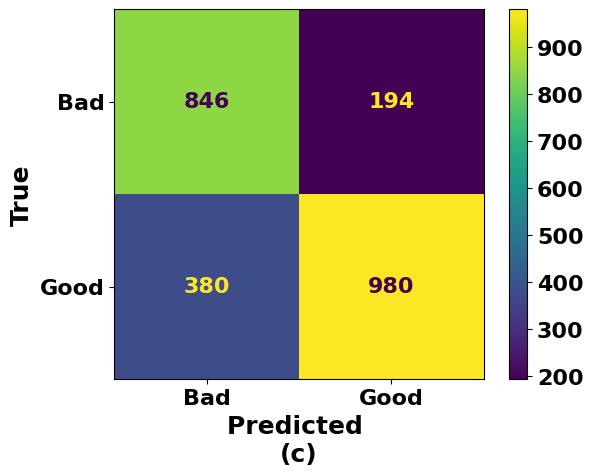

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred_labels = model.predict(X_test)
cm = confusion_matrix(y_test, pred_labels.round())
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
cm_display.plot()
cm_display.ax_.set(xlabel='Predicted \n({})'.format(sub_caption), ylabel='True')
plt.savefig(f'results/figures/{data_name}-dataset-{dataset_number}-confusion.eps', format='eps', bbox_inches='tight')
plt.show()

In [89]:
# Extracting values from the confusion matrix
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Compute metrics
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
precision = TP / (TP + FP)  # Precision
recall = TPR  # Recall is the same as TPR
f1_score = 2 * (precision * recall) / (precision + recall)  # F1-Score

# Print the metrics
print("True Positive Rate (TPR) / Recall: ", TPR)
print("False Positive Rate (FPR): ", FPR)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

True Positive Rate (TPR) / Recall:  0.7205882352941176
False Positive Rate (FPR):  0.18653846153846154
Precision:  0.8347529812606473
Recall:  0.7205882352941176
F1-Score:  0.7734806629834253


In [90]:
with open(f'results/{data_name}-dataset-{dataset_number}-metrics.txt', 'w') as f:
    f.write(f"Signal,accuracy,TPR,FPR,Precision,Recall,F1-Score\n")
    f.write(f"{data_name},{dl_model_accuracy},{TPR},{FPR},{precision},{recall},{f1_score}\n")